In [224]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from nona.nona import nona

In [225]:
df = pd.read_csv("./credit_scoring_train.csv")

In [226]:
df.head()

,client_id,DIR,Age,NumLoans,NumRealEstateLoans,NumDependents,Num30-59Delinquencies,Num60-89Delinquencies,Income,BalanceToCreditLimit,Delinquent90
0,0,0.496289,49.1,13,0,0.0,2,0,5298.360639,0.387028,0
1,1,0.433567,48.0,9,2,2.0,1,0,6008.056256,0.234679,0
2,2,2206.731199,55.5,21,1,NaN,1,0,NaN,0.348227,0
3,3,886.132793,55.3,3,0,0.0,0,0,NaN,0.971930,0
4,4,0.000000,52.3,1,0,0.0,0,0,2504.613105,1.004350,0


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   client_id              75000 non-null  int64  
 1   DIR                    75000 non-null  float64
 2   Age                    75000 non-null  float64
 3   NumLoans               75000 non-null  int64  
 4   NumRealEstateLoans     75000 non-null  int64  
 5   NumDependents          73084 non-null  float64
 6   Num30-59Delinquencies  75000 non-null  int64  
 7   Num60-89Delinquencies  75000 non-null  int64  
 8   Income                 60153 non-null  float64
 9   BalanceToCreditLimit   75000 non-null  float64
 10  Delinquent90           75000 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 6.3 MB


In [228]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
client_id,75000.0,37499.500000,21650.779432,0.0,18749.750000,37499.500000,56249.250000,7.499900e+04
DIR,75000.0,353.260293,2117.237432,0.0,0.176022,0.366848,0.862650,3.326003e+05
Age,75000.0,52.595605,14.869729,21.0,41.300000,52.200000,63.100000,1.098000e+02
NumLoans,75000.0,8.449760,5.156440,0.0,5.000000,8.000000,11.000000,5.600000e+01
NumRealEstateLoans,75000.0,1.016693,1.124019,0.0,0.000000,1.000000,2.000000,3.200000e+01
NumDependents,73084.0,0.755966,1.108119,0.0,0.000000,0.000000,1.000000,2.000000e+01
Num30-59Delinquencies,75000.0,0.428320,4.276439,0.0,0.000000,0.000000,0.000000,9.800000e+01
Num60-89Delinquencies,75000.0,0.248000,4.239486,0.0,0.000000,0.000000,0.000000,9.800000e+01
Income,60153.0,6740.059287,14228.754880,0.0,3421.353782,5424.552473,8291.517816,1.805573e+06
BalanceToCreditLimit,75000.0,6.276196,267.743321,0.0,0.029703,0.153720,0.560638,5.087387e+04


In [229]:
def show_diagramm_vibros(df):
    for i in df.columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[i])
        plt.title(i)
        plt.show()

In [230]:
df.drop("client_id", axis=1, inplace=True) # Не нужные технические данные

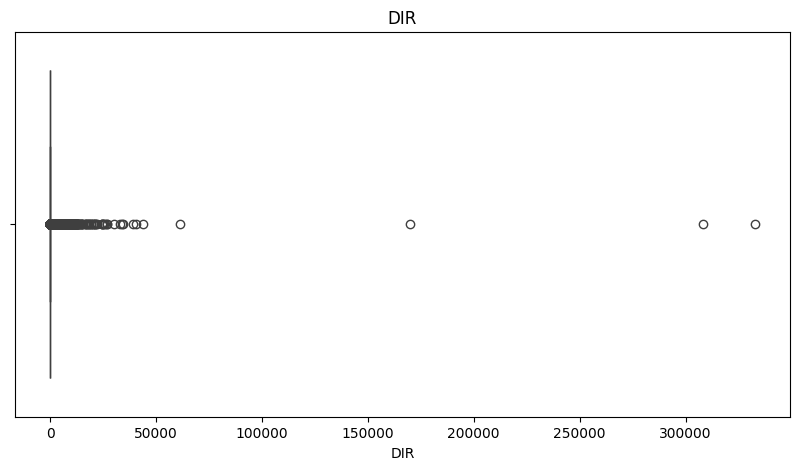

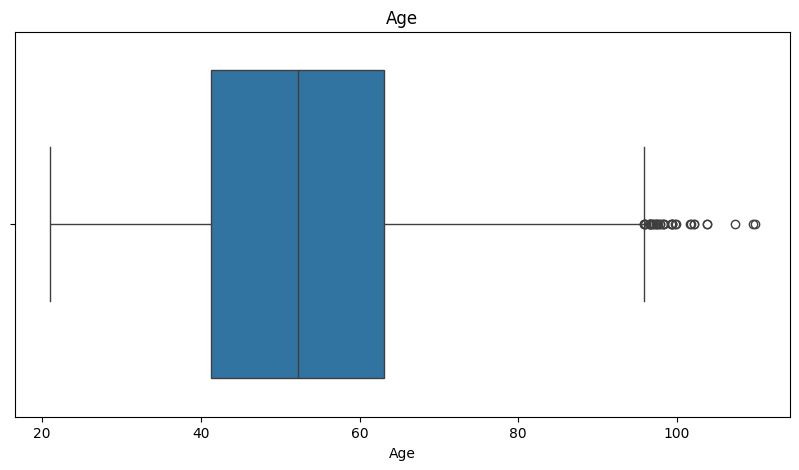

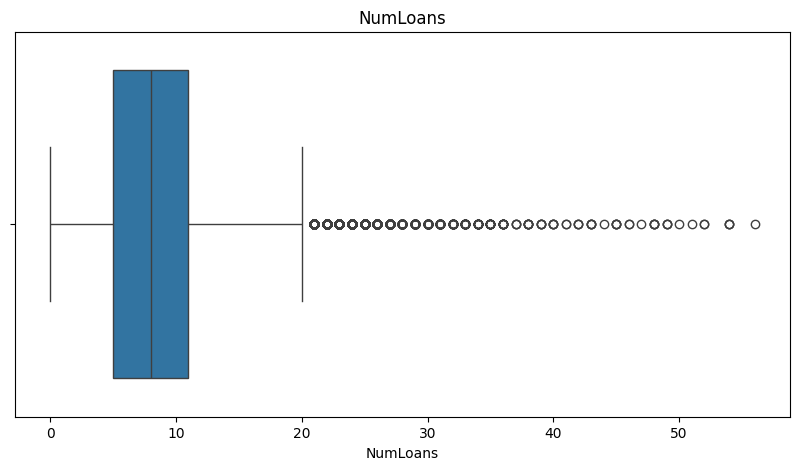

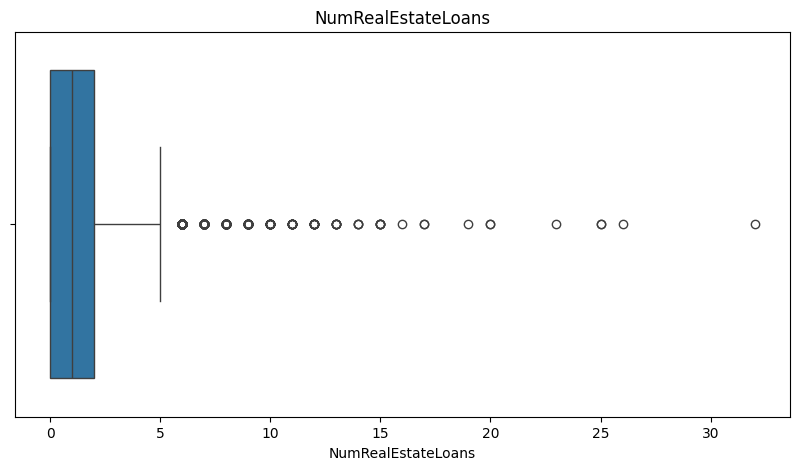

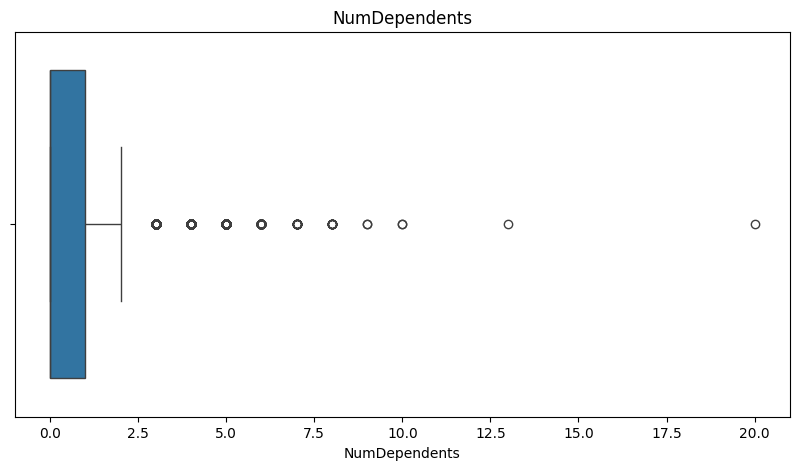

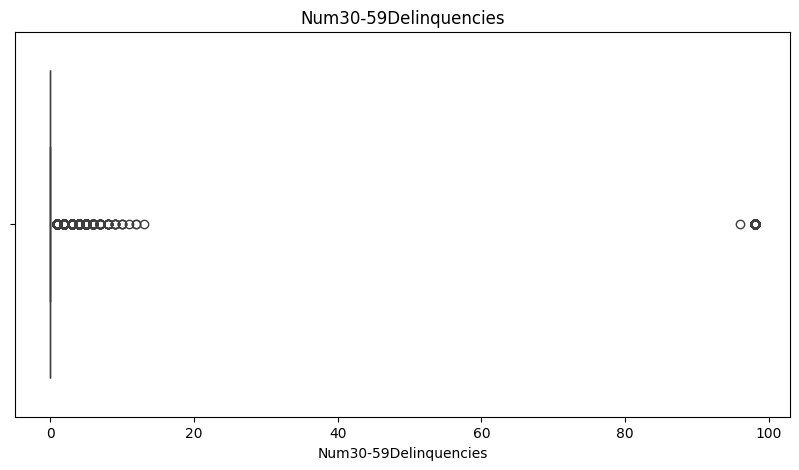

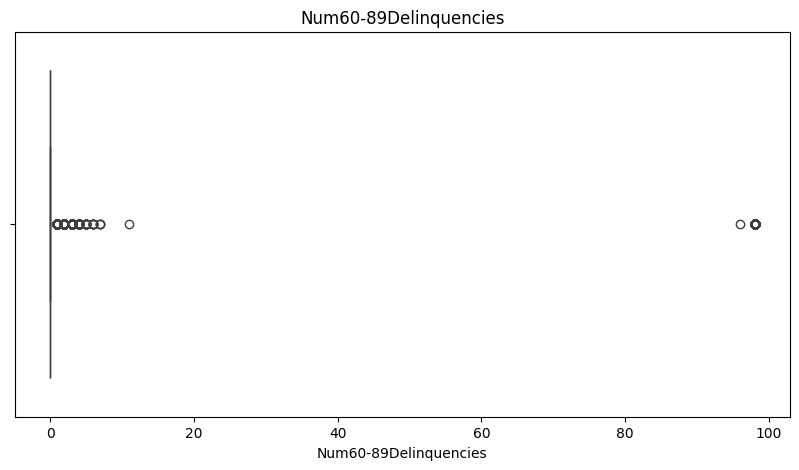

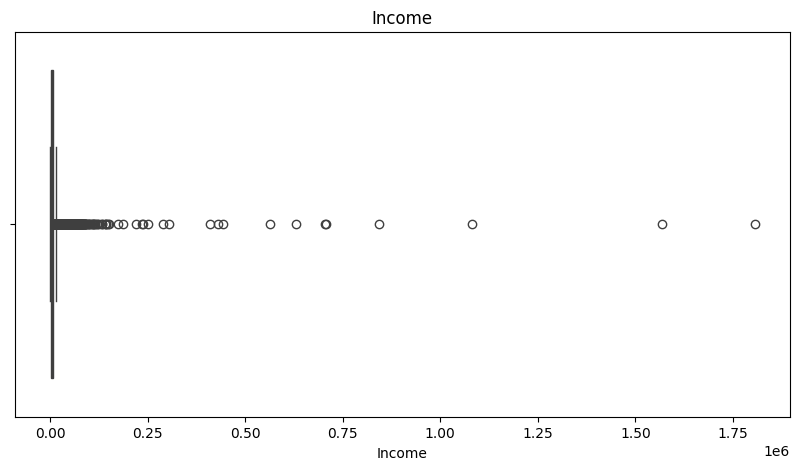

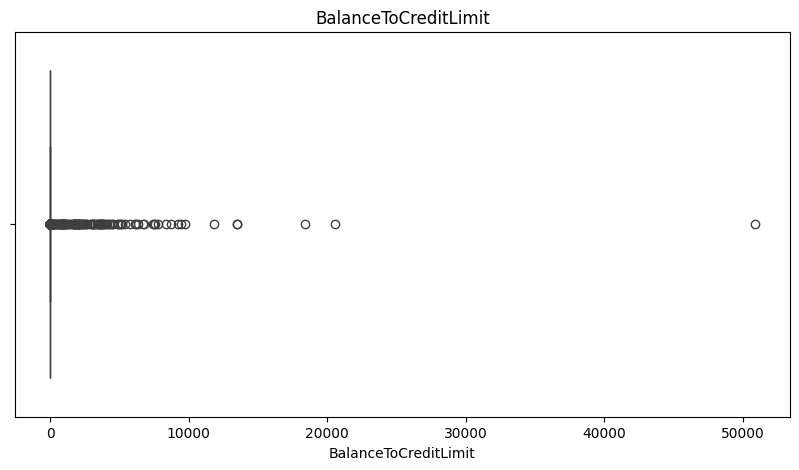

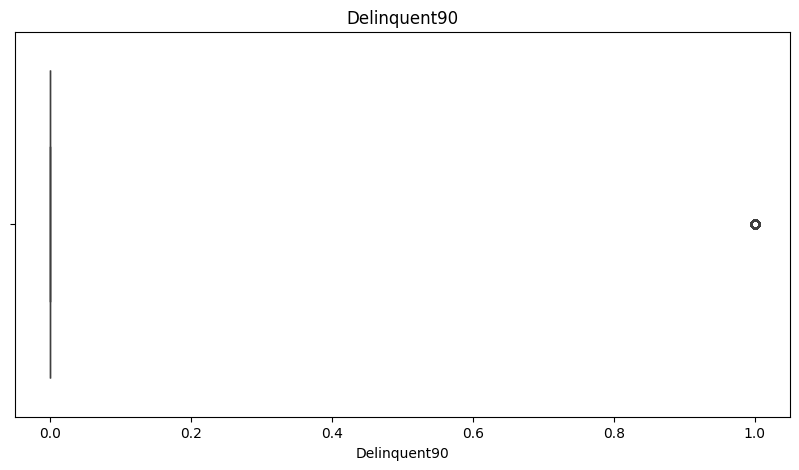

In [231]:
show_diagramm_vibros(df) # Отображаем графики до устранения выбросов

In [232]:
(df.isnull().sum() / df.shape[0]) * 100

DIR                       0.000000
Age                       0.000000
NumLoans                  0.000000
NumRealEstateLoans        0.000000
NumDependents             2.554667
Num30-59Delinquencies     0.000000
Num60-89Delinquencies     0.000000
Income                   19.796000
BalanceToCreditLimit      0.000000
Delinquent90              0.000000
dtype: float64

In [233]:
nona(df)

100%|██████████| 10/10 [00:01<00:00,  9.91it/s]


In [234]:
df.dropna(inplace=True)
df.isnull().sum()

DIR                      0
Age                      0
NumLoans                 0
NumRealEstateLoans       0
NumDependents            0
Num30-59Delinquencies    0
Num60-89Delinquencies    0
Income                   0
BalanceToCreditLimit     0
Delinquent90             0
dtype: int64

In [235]:
# Удаляем выбросы с помощью межквартильного размаха

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

data_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [236]:
data_no_outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
DIR,38421.0,0.318557,0.283281,0.0,0.109511,0.270581,0.445126,1.892300
Age,38421.0,53.008334,15.555381,21.0,41.100000,53.100000,64.100000,95.700000
NumLoans,38421.0,7.962494,4.316871,0.0,5.000000,7.000000,11.000000,20.000000
NumRealEstateLoans,38421.0,0.904609,0.923399,0.0,0.000000,1.000000,1.000000,5.000000
NumDependents,38421.0,0.515656,0.742511,0.0,0.000000,0.000000,1.000000,2.000000
Num30-59Delinquencies,38421.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Num60-89Delinquencies,38421.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Income,38421.0,5597.795271,2893.311312,0.0,3386.149720,5053.994872,7499.436145,13413.015552
BalanceToCreditLimit,38421.0,0.274618,0.326568,0.0,0.023830,0.116740,0.440612,1.346980
Delinquent90,38421.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


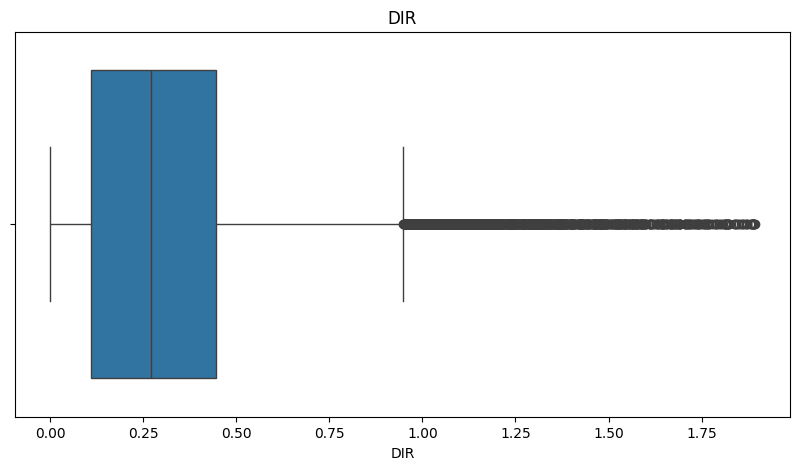

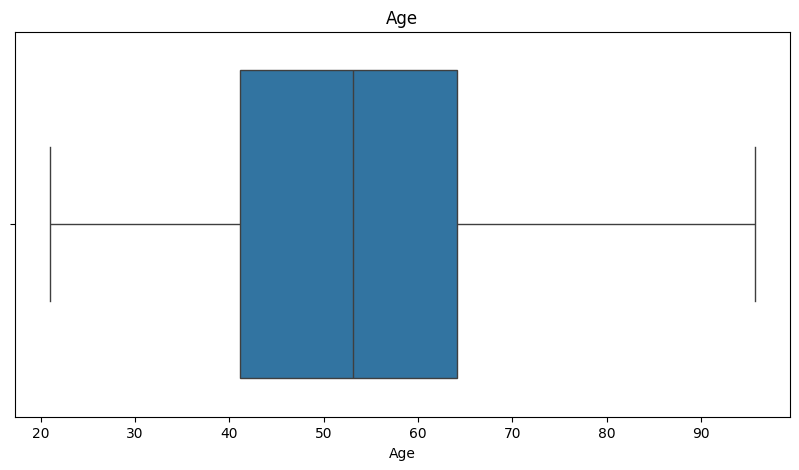

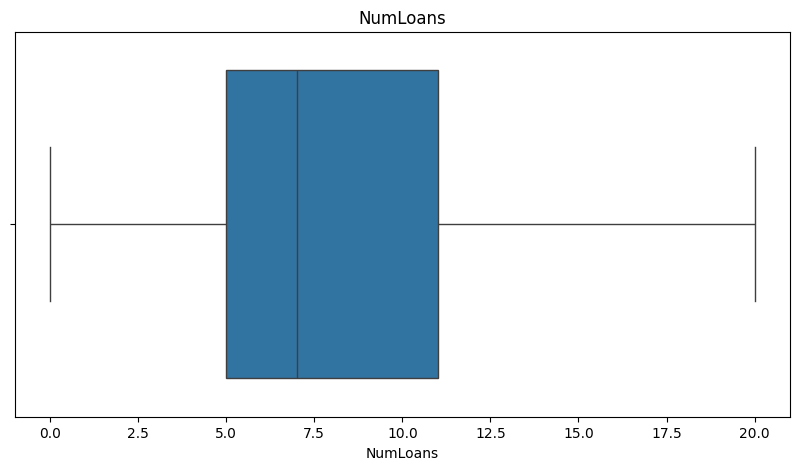

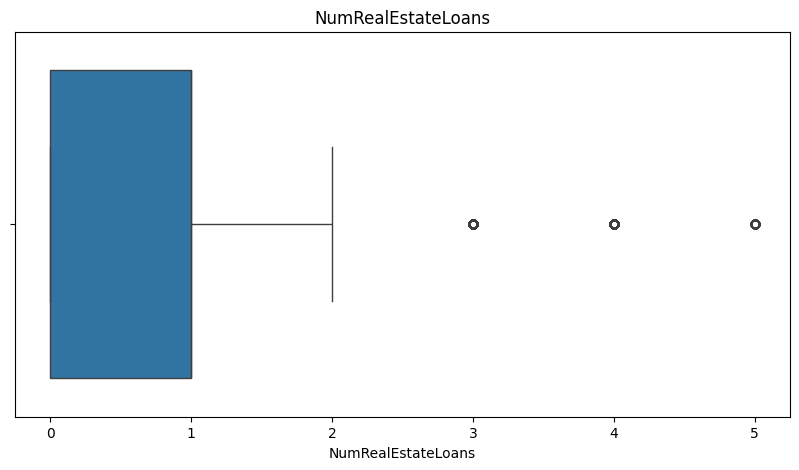

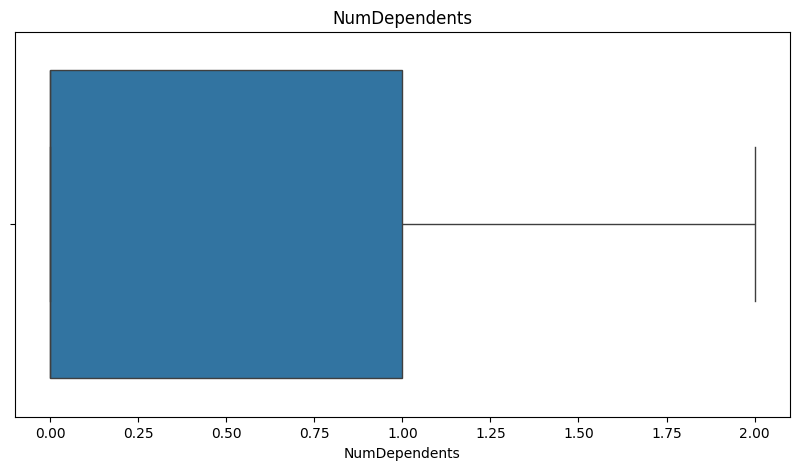

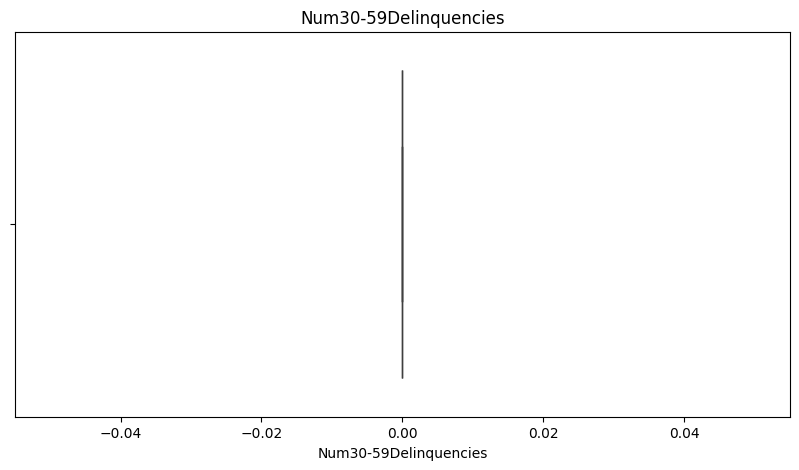

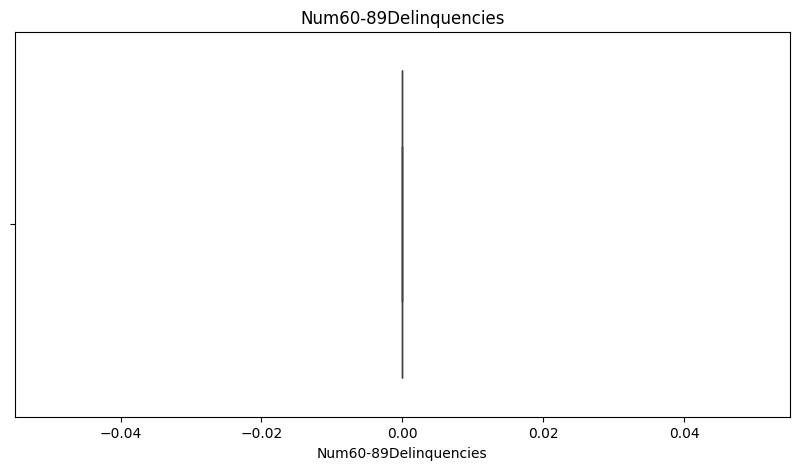

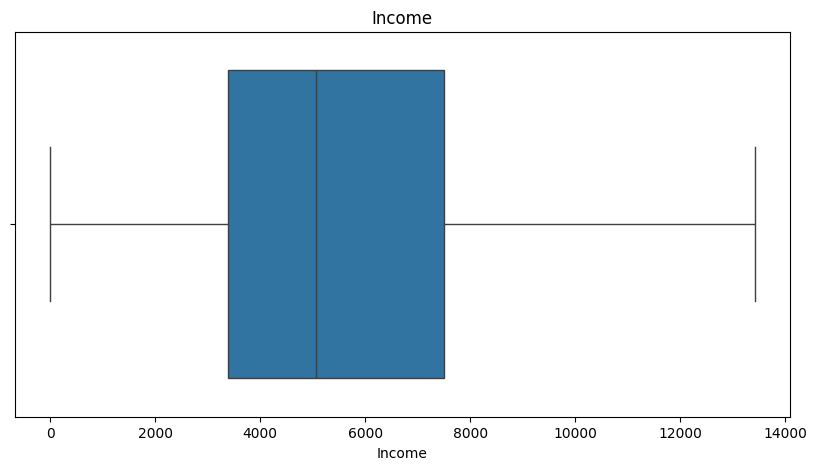

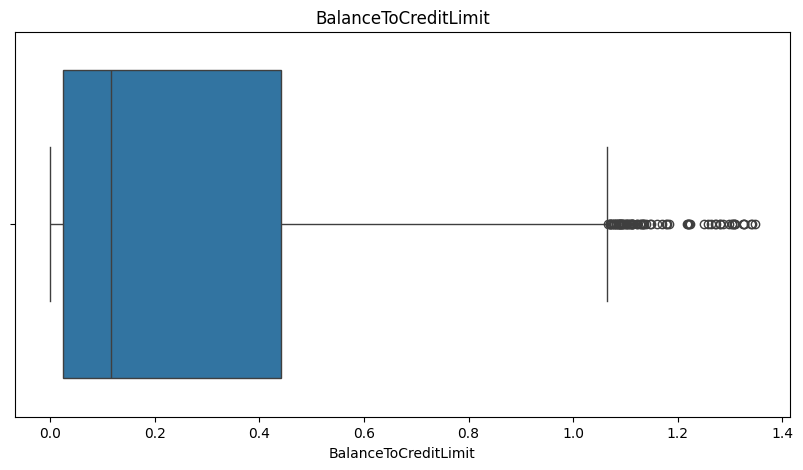

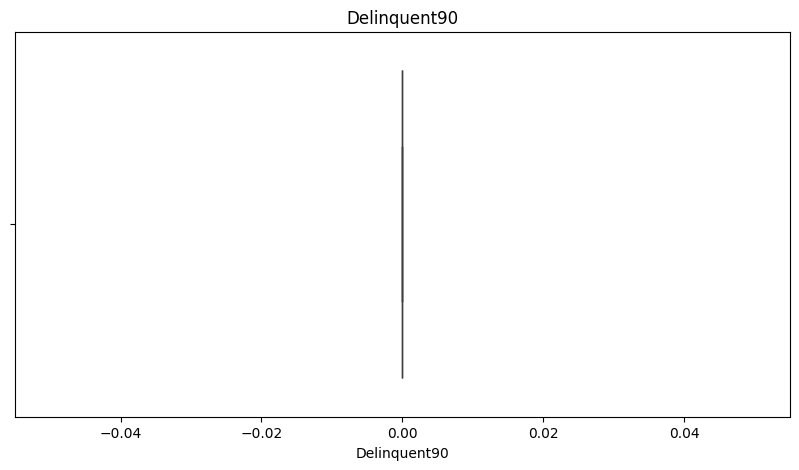

In [237]:
show_diagramm_vibros(data_no_outliers)

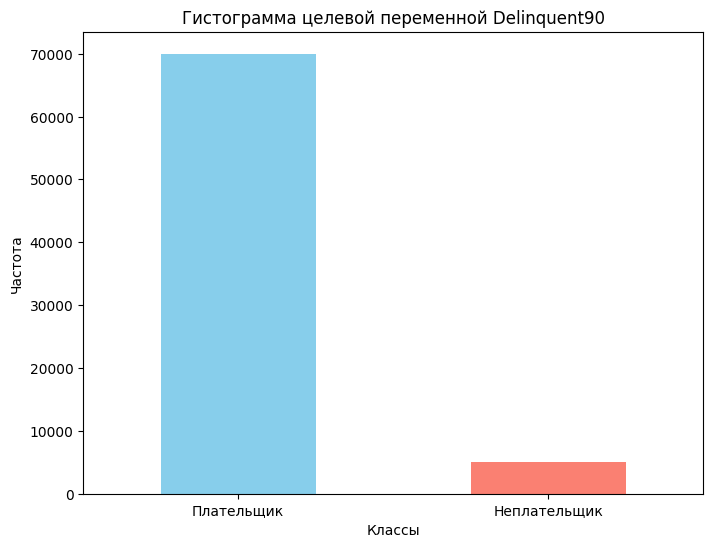

In [238]:
# Построение гистограммы целевой переменной

plt.figure(figsize=(8, 6))
df['Delinquent90'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Гистограмма целевой переменной Delinquent90')
plt.xlabel('Классы')
plt.ylabel('Частота')
plt.xticks(ticks=[0, 1], labels=['Плательщик', 'Неплательщик'], rotation=0)
plt.show()


# Обучение модели дерева принятия решений

In [239]:
from sklearn.model_selection import train_test_split

X = df.drop('Delinquent90', axis=1)
y = df['Delinquent90']
feature_names = X.columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80, stratify=y)

In [240]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix

dt_model = DecisionTreeClassifier(max_depth=5, random_state=80)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=80)

In [241]:
def show_roc_auc_score(model, *, for_model=""):
    # Получение вероятностей для ROC-AUC
    y_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_proba)

    # Построение ROC-кривой
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC-кривая (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Ложноположительная доля')
    plt.ylabel('Истинноположительная доля')
    plt.title('ROC-кривая')
    plt.legend(loc='lower right')
    plt.show()

    print(f'ROC-AUC{" для " + for_model if for_model != "" else ""}: {roc_auc:.2f}')


def show_error_matrix(model):
    # Матрица неточностей
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Payer', 'Defaulter'], yticklabels=['Payer', 'Defaulter'])
    plt.ylabel('Истинные значения')
    plt.xlabel('Предсказанные значения')
    plt.title('Матрица неточностей')
    plt.show()

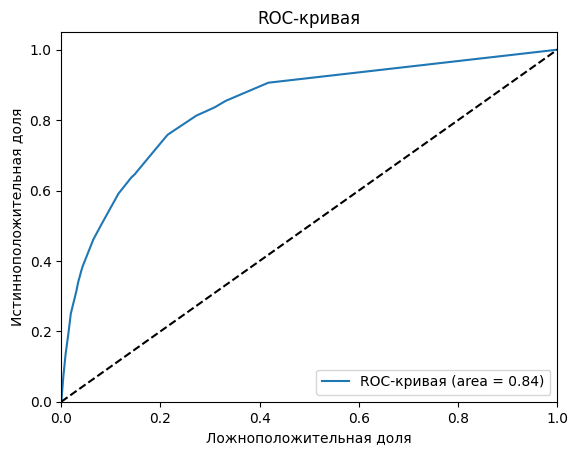

ROC-AUC для DecisionTreeClassifier: 0.84


In [242]:
show_roc_auc_score(dt_model, for_model="DecisionTreeClassifier")

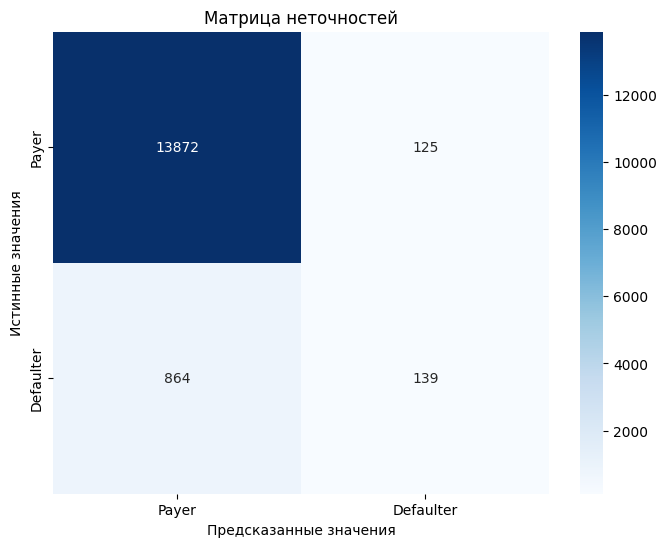

In [243]:
show_error_matrix(dt_model)

In [244]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=80), param_grid,
                           scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_auc = grid_search.best_score_
best_params = grid_search.best_params_

print(f'Лучшие параметры: {best_params}')
print(f'Лучший ROC-AUC: {best_auc}')

Лучшие параметры: {'max_depth': 6, 'min_samples_leaf': 5}
Лучший ROC-AUC: 0.8254464860353135


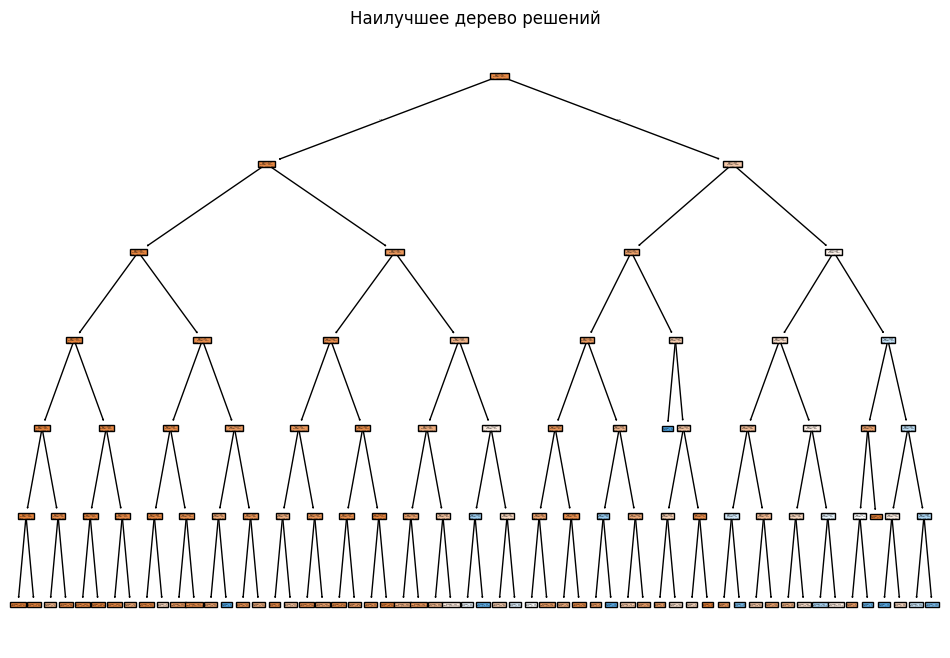

In [245]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(best_model, filled=True)
plt.title('Наилучшее дерево решений')
plt.show()


# практическая 2 часть

In [246]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=250, n_jobs=-1, class_weight='balanced', random_state=80)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=250, n_jobs=-1,
                       random_state=80)

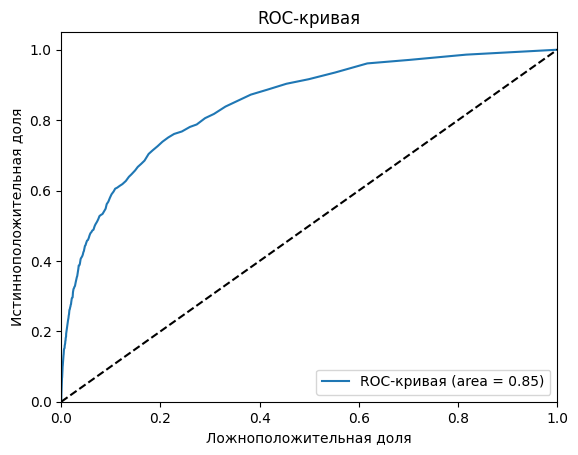

ROC-AUC для RandomForestClassifier: 0.85


In [247]:
show_roc_auc_score(rf_model, for_model="RandomForestClassifier")

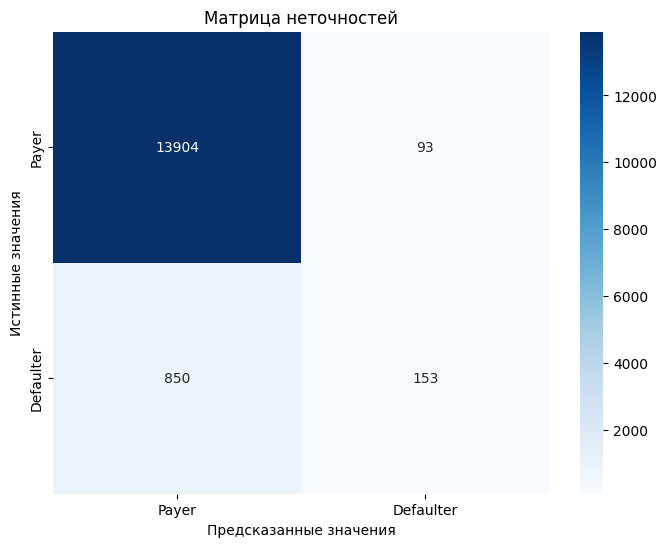

In [248]:
show_error_matrix(rf_model)

# roc-auc улучшился в положительную сторону (на 0.01)

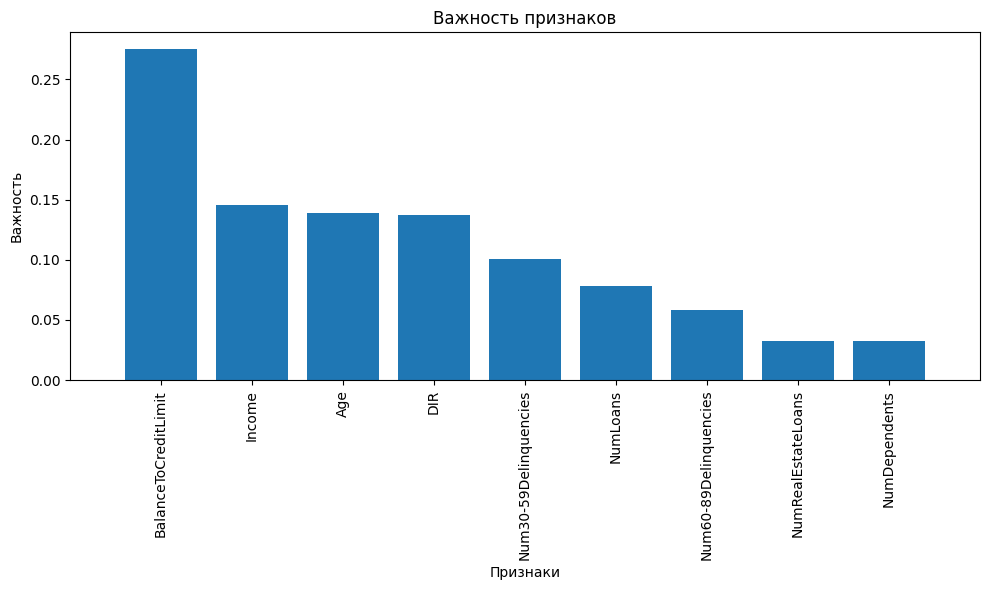

Самый важный признак: BalanceToCreditLimit
Самый слабый признак: NumDependents


In [249]:
import matplotlib.pyplot as plt
import numpy as np

# Получение важности признаков
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.title("Важность признаков")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Важность")
plt.xlabel("Признаки")
plt.tight_layout()
plt.show()

# Вывод наиболее важных признаков
most_important_feature = feature_names[indices[0]]
least_important_feature = feature_names[indices[-1]]

print(f'Самый важный признак: {most_important_feature}')
print(f'Самый слабый признак: {least_important_feature}')



Наиболее важный признак: BalanceToCreditLimit.

Этот признак, представляющий собой отношение баланса на кредитной карте к лимиту по кредиту, оказался самым значимым для предсказания вероятности просрочки по кредиту. \
Это может указывать на то, что клиенты, которые используют большую часть своего кредитного лимита, имеют более высокий риск невыплаты. \
Высокое соотношение баланса к лимиту может сигнализировать о финансовых трудностях, что делает этот признак критически важным в контексте кредитного скоринга.

# Создание ансамбля (3 задание)

In [250]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier


ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('dt', dt_model),
    ('lr', LogisticRegression(max_iter=1000))
], voting='soft') # Создание ансамбля моделей (По приколу взял еще логичтическую регрессию)

ensemble_model.fit(X_train, y_train)

/home/dimflix/.local/share/pyenv/versions/3.11.10/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     n_estimators=250,
                                                     n_jobs=-1,
                                                     random_state=80)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=80)),
                             ('lr', LogisticRegression(max_iter=1000))],
                 voting='soft')

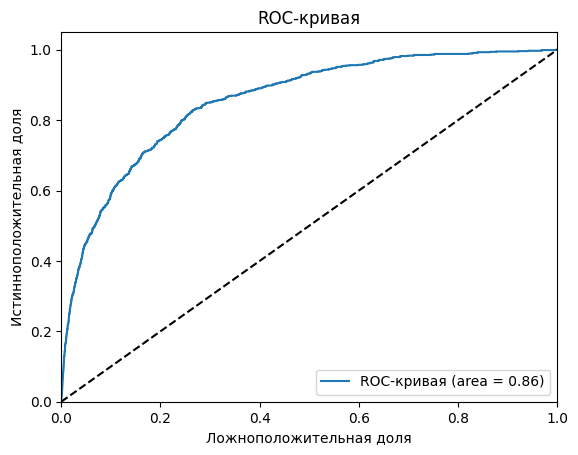

ROC-AUC для Ansamble (DecisionTreeClassifier, RandomForestClassifier, LogisticRegression): 0.86


In [251]:
show_roc_auc_score(ensemble_model, for_model="Ansamble (DecisionTreeClassifier, RandomForestClassifier, LogisticRegression)")